#### 군집(clustering) 분석
- 데이터를 여러 그룹으로 묶음 -> 우사한 row끼리 그룹화
- 군집별 특성을 파악해 전체 자료구조에 대한 이해를 도움

#### 거리
- 데이터간에 얼마나 유사한가를 측정하는 정도
- Euclidean, Minkowski, Manhattan

In [5]:
import seaborn as sns

df = sns.load_dataset('iris')

In [11]:
print(df.shape)
df.head(10)

# iris 꽃을 몇 종류로 군집화 할 수 있는가?
# 꽃의 종류가 3개 이기 때문에 3가지로 응집하는 것이 이상적이다

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [13]:
set(df['species'])

{'setosa', 'versicolor', 'virginica'}

In [15]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
x = df[features]

In [19]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)
# x_scaled

In [27]:
import pandas as pd

pd.DataFrame(x_scaled, columns=features).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [33]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(x_scaled, metric='euclidean')))
row_dist

# 값이 작을 수록 거리가 가깝다

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,1.176219,0.845607,1.103685,0.260139,1.038444,0.661331,0.266276,1.620821,0.962877,...,4.323335,4.203388,3.679790,4.347745,4.371458,4.170050,4.075223,3.805412,3.826157,3.335064
1,1.176219,0.000000,0.523373,0.434000,1.386485,2.181206,0.998654,0.930463,0.648099,0.271197,...,4.346806,4.241393,3.331094,4.437906,4.513641,4.130727,3.660136,3.746638,4.017345,3.213476
2,0.845607,0.523373,0.000000,0.283891,0.991572,1.853897,0.497194,0.597511,0.782483,0.376784,...,4.503900,4.411912,3.574016,4.577287,4.620161,4.317340,3.973046,3.936541,4.072716,3.380336
3,1.103685,0.434000,0.283891,0.000000,1.250160,2.100774,0.705317,0.843695,0.523373,0.386603,...,4.504592,4.426571,3.486580,4.588504,4.642323,4.311771,3.887869,3.922954,4.097587,3.340154
4,0.260139,1.386485,0.991572,1.250160,0.000000,0.900113,0.681319,0.463889,1.767789,1.166192,...,4.433129,4.323032,3.829088,4.448334,4.456354,4.296127,4.252915,3.935711,3.890518,3.457620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.170050,4.130727,4.317340,4.311771,4.296127,4.121389,4.349495,4.141813,4.486161,4.197460,...,0.349293,0.339039,1.395203,0.620434,0.791824,0.000000,1.360083,0.463325,1.108067,1.173044
146,4.075223,3.660136,3.973046,3.887869,4.252915,4.357976,4.142182,3.967153,3.916907,3.789007,...,1.640744,1.648230,0.763043,1.871492,2.099612,1.360083,0.000000,1.189008,2.153099,1.257071
147,3.805412,3.746638,3.936541,3.922954,3.935711,3.802866,3.977470,3.766660,4.099560,3.806455,...,0.663805,0.668634,1.103120,0.811378,1.024490,0.463325,1.189008,0.000000,1.071844,0.775292
148,3.826157,4.017345,4.072716,4.097587,3.890518,3.597498,3.982224,3.830008,4.346450,4.032118,...,0.934989,1.106974,1.771370,0.906236,0.720010,1.108067,2.153099,1.071844,0.000000,1.200930


In [41]:
from scipy.cluster.hierarchy import linkage

cluster1 = linkage(y=x_scaled, method='complete', metric='euclidean')
cluster1[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

In [43]:
# 시각화 - dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

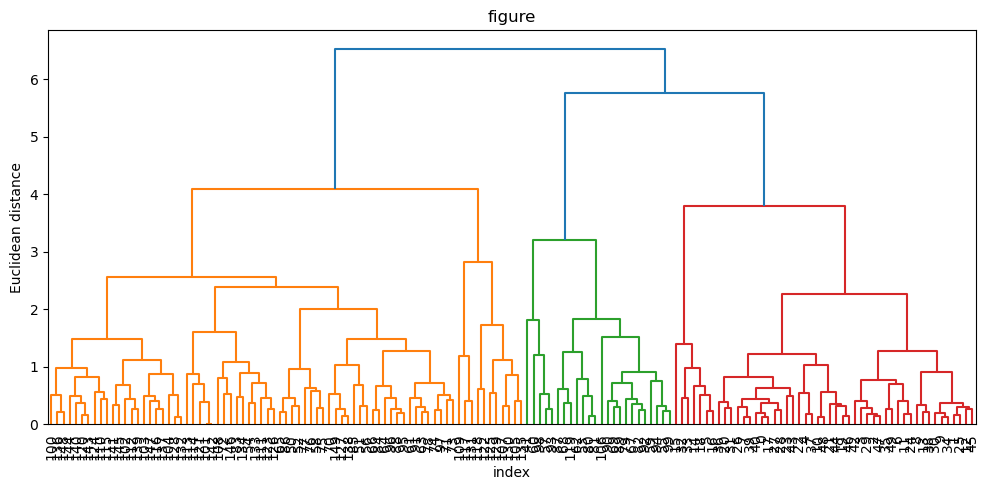

In [47]:
plt.figure(figsize=(10,5))
plt.title('figure')
plt.xlabel('index')
plt.ylabel('Euclidean distance')

dendrogram(cluster1, leaf_rotation=90, leaf_font_size=10)
plt.tight_layout()
plplt.show()

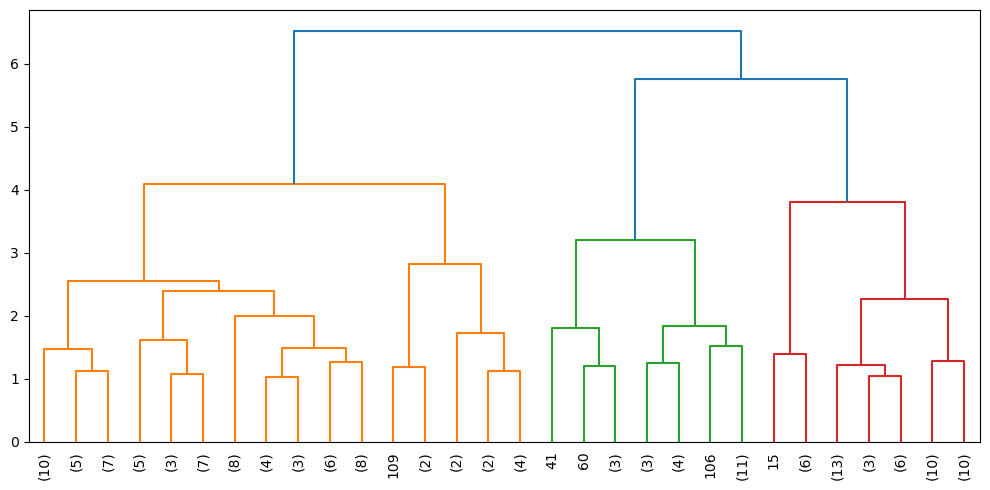

In [49]:
plt.figure(figsize=(10,5))
dendrogram(cluster1, leaf_rotation=90, leaf_font_size=10, truncate_mode='lastp')
plt.tight_layout()
plt.show()

#### 군빚화된 데이터 분석

In [52]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

In [72]:
x['cluster1'] = fcluster(cluster1, t=5, criterion='distance')
set(df['cluster1'])

C:\Users\405-11\AppData\Local\Temp\ipykernel_9200\235699650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster1'] = fcluster(cluster1, t=5, criterion='distance')


{1, 2, 3}

In [66]:
df['cluster1'].value_counts()

cluster1
1    77
3    49
2    24
Name: count, dtype: int64

In [68]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [74]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster1'],
      dtype='object')

In [80]:
interesting = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster1']
df[interesting].groupby('cluster1').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster1,,,,
1,6.472727,2.990909,5.183117,1.815584
2,5.512500,2.466667,3.866667,1.170833
3,5.016327,3.451020,1.465306,0.244898


In [82]:
cluster2 = linkage(y=x, method='single', metric='euclidean')

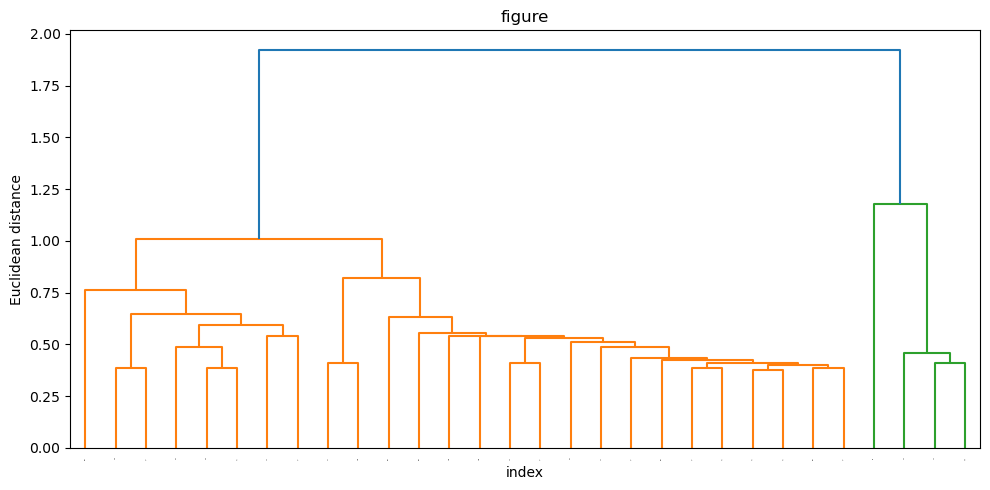

In [88]:
plt.figure(figsize=(10,5))
plt.title('figure')
plt.xlabel('index')
plt.ylabel('Euclidean distance')

dendrogram(cluster2, leaf_rotation=90, leaf_font_size=1,truncate_mode='lastp')
plt.tight_layout()
plt.show()

#### K-Means
- 주어진 군집수에 대해 군집내 거리 제곱합의 합을 최소화하는 것을 목적으로 함
- 사전에 결정된 군집수(k)가 주어지면 Euclidean 거리를 이용해서 전체 자료를 상대적으로 유사한 K개의 굽닙으로 나눔

#### K-Means 군집 알고리즘
1. 무작위 k개의 초기 군집 중심을 정함
2. 각 샘플에서 가장 가까운 군집 중심을 찾아 해당 군집의 샘플로 지정
3. 각 군집에 속한 샘플의 평균값으로 군집의 중심을 변경함
4. 군집의 중심에 변화가 없을 때까지 반복


In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(x_scaled)

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [95]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [101]:
df['kmeans'] = kmeans.predict(x_scaled)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1,kmeans
0,5.1,3.5,1.4,0.2,setosa,3,1
1,4.9,3.0,1.4,0.2,setosa,3,1
2,4.7,3.2,1.3,0.2,setosa,3,1
3,4.6,3.1,1.5,0.2,setosa,3,1
4,5.0,3.6,1.4,0.2,setosa,3,1


In [105]:
df['kmeans'].value_counts()

kmeans
2    53
1    50
0    47
Name: count, dtype: int64

#### 차원축소(Dimensionality Reduction)
- 데이터가 가진 속성을 차원이라 함
- 100개의 특성은 100개의 차원, 이 차원을 줄이는 것이 차원의 축소
- 데이터를 가장 잘 나타내는 일부 특성만으로 데이터의 크기를 줄이고 지도 학습의 성능을 향상 시킬수 있다.

##### PCA(주성분 분석)
- 대표적인 차원 축소 알고리즘
- 데이터의 분포 특성을 잘 설명하는 벡터를 선택
- 선택한 벡터를 위한 적정한 가중치를 찾을 때까지 계속 학습

In [115]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [113]:
from sklearn.decomposition import PCA

In [152]:
interesting = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = 'species'

model = PCA(n_components=2)
pca_df = pd.DataFrame(model.fit_transform(df[features]), columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


##### PCA 수학적 설명
- Column 공분산을 구해서 공분산 행렬을 구함, df.cov()
- 공분한 행렬 : 가로 세로 길이가 같은 정방행렬(squre matrix)
- 고유값, 고유벡터를 정방행렬에서 뽑아낼수 있음
- 교유값(eigen value)을 크기 순으로 정렬함
- 크기가 가장 큰 고유값부터 정렬하면 순서를 갖음
- 고유값과 고유벡터는 한 쌍으로 있음
- 고유벡터의 크기가 큰 것부터 작은 것 순서대로 PC1, PC2 ... 로 이름을 붙인다



In [120]:
# 누적 기여율
model.explained_variance_ratio_

# 전체 데이터중에서 92%를 설명할 수 있는 PC1
# 두번째 주성분은 5%만 설명할 수 있다 PC2
# 주 성분의 누적 결과로 인해 2개의 column만으로도 약 97%를 설명할 수 있다.

array([0.92461872, 0.05306648])

In [140]:
pca_df['taget'] = df[label]


{'setosa', 'versicolor', 'virginica'}

<Axes: xlabel='PC1', ylabel='PC2'>

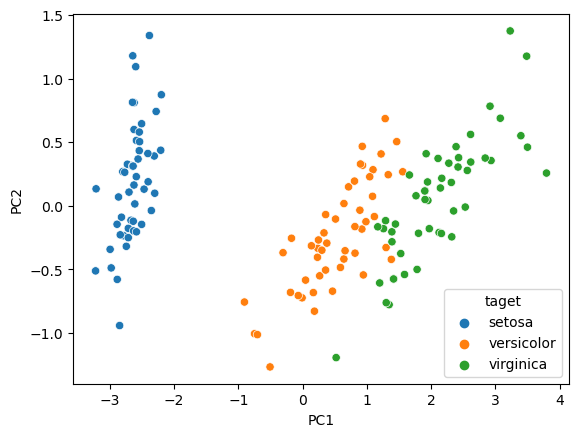

In [134]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='taget')

In [154]:
# PCA로 kmeans 군집 분석
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [160]:
pca_df['kmeans'] = kmeans.predict(pca_df)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- kmeans


In [166]:
pca_df['kmeans'].value_counts()
# 점수가 떨어졌음

kmeans
2    61
0    50
1    39
Name: count, dtype: int64

<Axes: xlabel='c1', ylabel='c2'>

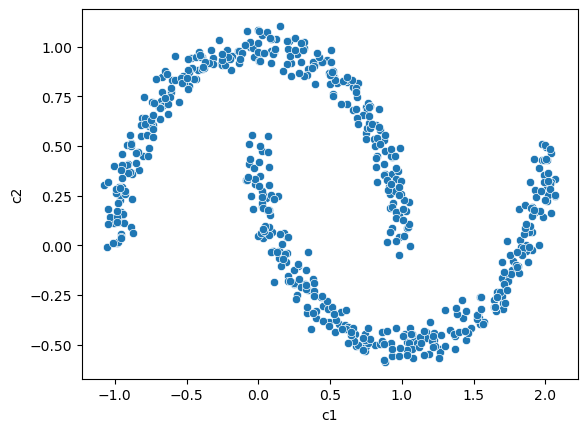

In [186]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=600, noise=0.05, random_state=0)
moons_df = pd.DataFrame(x, columns=['c1', 'c2'])

sns.scatterplot(data=moons_df, x='c1', y='c2')

In [188]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(moons_df)

C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\405-11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [190]:
kmeans.labels_

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [192]:
moons_df['kmeans'] = kmeans.predict(moons_df)

<Axes: xlabel='c1', ylabel='c2'>

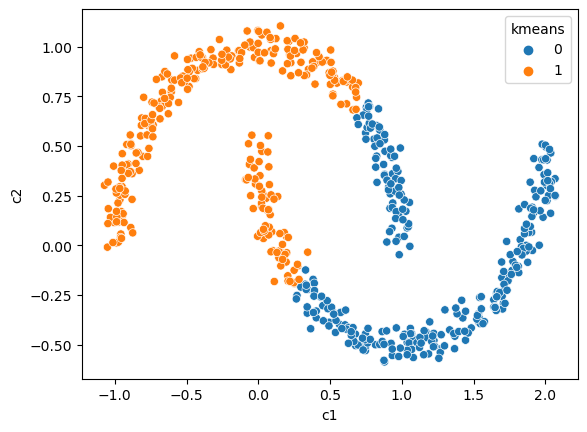

In [196]:
sns.scatterplot(data=moons_df, x='c1', y='c2', hue='kmeans')

#### DBSCAN(밀도기반분석)\
- Density-Based Spatial clustering of Application with Noise
- 거리가 아닌 일정한 밀도기반의 군집을 형성하는 방법
- 이상치가 많이 포함되어 있을때 유용
- noise에 영향을 받지 않는다
- kmeans보다 연산량이 많다
- 오목하거나 볼록한 부분을 처리하는데 유용함


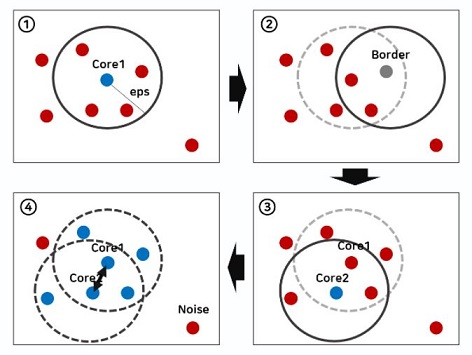


##### 밀도 기반군집 분석의 절차
1. 하나의 점(파란색)을 중심으로 반경(eps) 내에 최소 점이 4개 이상 있으면, 하나의 군집으로 판단->해당점을 Core라고 한다
2. 반경 내에 점이 3개이므로 core가 되진 않지만 core1의 군집에 포함됨 -> Border라고 한다
3. 1번과 마찬가지로 코어가 됨
4. 그런데 반경내에 점 중에서 첫번째 core1이 포함되어 있으므로 하나의 군집으로 취급함

In [205]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=3)

In [211]:
dbscan.fit(moons_df[['c1', 'c2']])
moons_df['dbscan'] = dbscan.labels_

<Axes: xlabel='c1', ylabel='c2'>

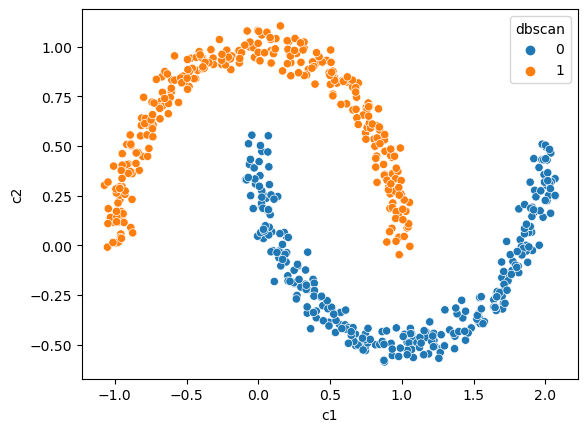

In [213]:
sns.scatterplot(data=moons_df, x='c1', y='c2', hue='dbscan')